In [1]:
import pandas as pd
import numpy as np
import os, pdb, sys, pickle
import matplotlib.pyplot as plt

files = [i for i in os.listdir(os.getcwd()) if '.csv' in i]
files

['0.0001-30trends.csv',
 '0.001-30trends.csv',
 '0.01-30trends.csv',
 '0.1-30trends.csv',
 '0.6-30trends.csv',
 '1.0-30trends.csv',
 '10-30trends.csv',
 '20-30trends.csv',
 '30-30trends.csv',
 '5-30trends.csv']

In [2]:
# CREATE THE DATASET
df = None
for f in files: 
    sub = pd.read_csv(os.getcwd() + '\\' + f)
    name = f.split('trends')[0].split('-')[0]
    if df is None: 
        df = sub.copy(deep = True)
        df.columns = ['idx', name]
    else: 
        df[name] = sub['avgs']
df = df.iloc[1:].reset_index(drop = True)
df.tail()

,idx,0.0001,0.001,0.01,0.1,0.6,1.0,10,20,30,5
21,:1150,1.151083,1.090381,0.981800,1.140788,1.492577,1.438143,0.000000,0.093594,0.042311,0.760750
22,:1200,0.804705,1.129948,0.808389,1.079011,1.602055,1.655716,0.126952,0.000000,0.024892,1.029407
23,:1250,1.254741,1.043076,0.828416,0.786042,1.376592,1.624081,0.300236,0.152413,0.000000,0.720156
24,:1300,1.086743,0.800111,1.257715,1.132958,1.591104,1.579606,0.317986,0.000000,0.000000,1.032257
25,:1350,1.023006,1.023488,1.377408,1.197898,1.171419,1.689462,0.694666,0.042763,0.000000,0.411602


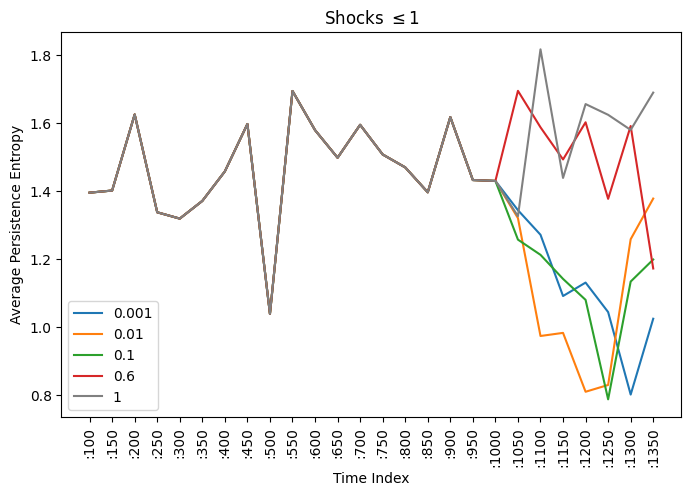

In [3]:
# Plot <= 1
plt.figure(figsize=(8,5))
plt.plot(df.index, df['0.001'], label = '0.001')
plt.plot(df.index, df['0.01'], label = '0.01')
plt.plot(df.index, df['0.1'], label = '0.1')
plt.plot(df.index, df['0.6'], label = '0.6')
plt.plot(df.index, df['1.0'], label = '1', color = 'grey')
plt.ylabel('Average Persistence Entropy')
plt.xlabel('Time Index')
plt.xticks(df.index, df['idx'], rotation = 90)
plt.title('Shocks $\leq 1$')
plt.legend()
plt.show()
plt.savefig('shocks_leq1.jpg', dpi = 1000)
plt.close()

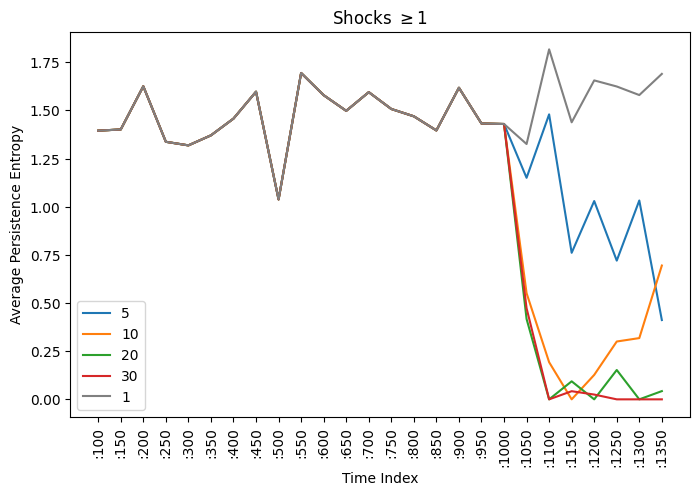

In [4]:
# Plot >=
plt.figure(figsize=(8,5))
plt.plot(df.index, df['5'], label = '5')
plt.plot(df.index, df['10'], label = '10')
plt.plot(df.index, df['20'], label = '20')
plt.plot(df.index, df['30'], label = '30')
plt.plot(df.index, df['1.0'], label = '1', color = 'grey')
plt.ylabel('Average Persistence Entropy')
plt.xlabel('Time Index')
plt.xticks(df.index, df['idx'], rotation = 90)
plt.title('Shocks $\geq 1$')
plt.legend()
plt.show()
plt.savefig('shocks_geq1.jpg', dpi = 1000)
plt.close()